# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [117]:
import pandas as pd
petroldf = pd.read_csv('petrol.csv')

In [118]:
petroldf.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [113]:
#working on the income col.
con_iqr = petroldf[' income'].quantile(0.75) - petroldf[' income'].quantile(0.25)
con_min = petroldf[' income'].quantile(0.25) - 1.5*Inc_iqr
con_max = petroldf[' income'].quantile(0.75) + 1.5*Inc_iqr
print (con_min, con_max)
y = 0
for x in range (48):
    if (petroldf.loc[0,' income'] > con_min and petroldf.loc[0,' income'] < con_max):
         y = y+1
    else:
            petroldf = petroldf.drop(petroldf.index[x])
print (y)
# no such outliers found for the given dataset which can be dropped

2479.375 5838.375
48


# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [119]:
petroldf.corr()
# number of driver and consumption has a correaltion closer to 1 i.e. 0.70 which shows there is a strong positive
# relation. Where as highway has correlation as ZERO hence it has no relation and Income & Tax has negative relation
# with consumption.

,tax,income,highway,dl,consumption
tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
income,0.012665,1.000000,0.050163,0.157070,-0.244862
highway,-0.522130,0.050163,1.000000,-0.064129,0.019042
dl,-0.288037,0.157070,-0.064129,1.000000,0.698965
consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


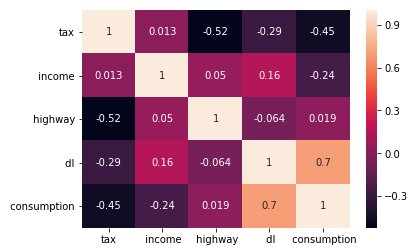

In [120]:
import seaborn as sns
sns.heatmap( petroldf.corr(), annot=True)

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [196]:
X = petroldf.iloc[:,3]
Y = petroldf.iloc[:,4]

In [197]:
X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [198]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

In [199]:
print('Shape of training sets x_train & y_train: ', x_train.shape, y_train.shape)
print('Shape of test sets x_test & y_test: ', x_test.shape, y_test.shape)

Shape of training sets x_train & y_train:  (38, 1) (38, 1)
Shape of test sets x_test & y_test:  (10, 1) (10, 1)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [200]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)
#petroldf_new = X,linreg.coef_
print('Coeffcient is :', linreg.coef_)

Coeffcient is : [[1439.69206301]]


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [201]:
test_acc = linreg.score(x_test, y_test)
train_acc = linreg.score(x_train, y_train)
print ('Accuracy value for test dataset is', test_acc)
print ('Accuracy value for train dataset is', train_acc)
# the accuracy is 50% through which is very low.

Accuracy value for test dataset is 0.4791773484291409
Accuracy value for train dataset is 0.48126930754695374


# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [195]:
X1 = petroldf.iloc[:,1:4]
Y1 = petroldf.iloc[:,4]
Y1 = Y1.values.reshape(-1,1)

In [202]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state = 1)
from sklearn.linear_model import LinearRegression
linreg1 = LinearRegression()
linreg1.fit(x_train1, y_train1)
test_acc1 = linreg1.score(x_test1, y_test1)
train_acc1 = linreg1.score(x_train1, y_train1)
print ('Accuracy value for multi linear test dataset is', test_acc1)
print ('Accuracy value for multi linear train dataset is', train_acc1)

Accuracy value for multi linear test dataset is 0.45572506500648824
Accuracy value for multi linear train dataset is 0.6402245472607815


# Question 9: Print the coefficients of the multilinear regression model

In [203]:
print('Coeffcient is :', linreg1.coef_)

Coeffcient is : [[-8.70073134e-02  2.24051274e-03  1.54339979e+03]]


# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

In [ ]:
# The accuracy of train dataset with only number of drivers aginst consumption was 48% whereas on including two more
# independant variable Income and Highway, the accuracy has improved to 64%. Still I won't say the model is good.